In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np


**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#UserId is not useful for model training, so dropping it
df=df.iloc[:,1:]
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [7]:
#Gender Feature needs to be converted into numeric format
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [8]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X=df.iloc[:,:-1]
y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


**Feature Scaling**

In [12]:
#Scaling Not mandatory in DT

**Fitting Decision Tree Classification to the Training set**

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)


DecisionTreeClassifier()

**Predicting the Test set results**

In [14]:
y_pred=DT.predict(X_test)
print(DT.score(X_test,y_test))

0.875


**Making the Confusion Matrix**

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.875
0.8873626373626373


array([[44,  8],
       [ 2, 26]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


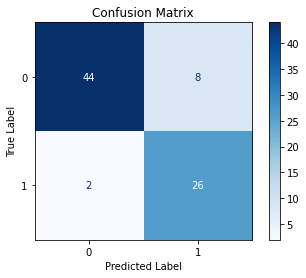

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(DT, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [17]:
#Auroc Score


**Visualising the Training set results**

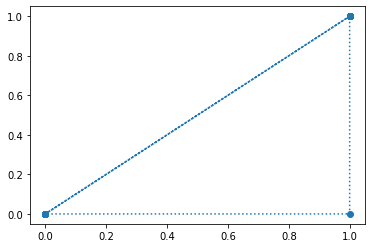

In [18]:
plt.plot(y_train,DT.predict(X_train),marker = 'o',linestyle = 'dotted')
plt.show()


**Visualising the Test set results**

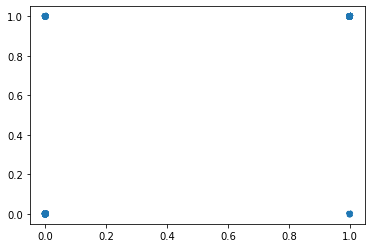

In [19]:
plt.scatter(y_test,y_pred,marker = 'o',linestyle = 'dashed')
plt.show()

[Text(0.4787234042553192, 0.9642857142857143, 'X[1] <= 42.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.2393617021276596, 0.8928571428571429, 'X[2] <= 90500.0\ngini = 0.277\nsamples = 229\nvalue = [191, 38]'),
 Text(0.09574468085106383, 0.8214285714285714, 'X[1] <= 36.5\ngini = 0.079\nsamples = 193\nvalue = [185, 8]'),
 Text(0.07446808510638298, 0.75, 'gini = 0.0\nsamples = 135\nvalue = [135, 0]'),
 Text(0.11702127659574468, 0.75, 'X[2] <= 67500.0\ngini = 0.238\nsamples = 58\nvalue = [50, 8]'),
 Text(0.09574468085106383, 0.6785714285714286, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.13829787234042554, 0.6785714285714286, 'X[1] <= 37.5\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.0851063829787234, 0.6071428571428571, 'X[2] <= 79500.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.06382978723404255, 0.5357142857142857, 'X[2] <= 76000.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0425531914893617, 0.4642857142857143, 'X[2] <= 72000.0\ng

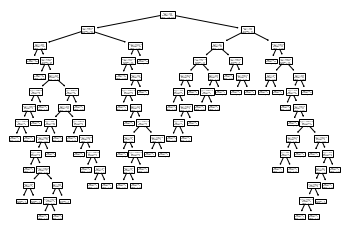

In [20]:
from sklearn import tree
tree.plot_tree(DT) 